In [279]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [280]:
def imageToArray(filename:str, rgb:bool=False):
    img = Image.open(filename)
    if not rgb:
        img = ImageOps.grayscale(img)
    img_array = np.array(img)
    return img_array

In [281]:
A = imageToArray("WingedFigure.jpg")
A_color=imageToArray("WingedFigure.jpg", rgb=True)


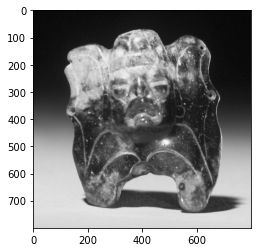

In [282]:
plt.imshow(A, cmap='gray')

In [283]:
def translation(A:np.array, x:int, y:int):
    result = np.zeros(A.shape, dtype=np.uint8)
    M, N = A.shape[0],A.shape[1]
    for i in range(M):
        for j in range(N):
            new_i=i+y
            new_j=j+x
            if (new_i>=0 and  new_i<M and new_j>=0 and  new_j<N ):
                result[new_i][new_j]=A[i][j]
    return result

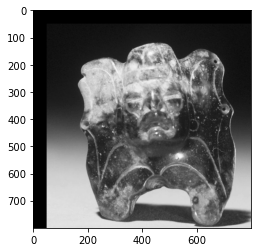

In [295]:
B = translation(A, 50, 50)
plt.imshow(B, cmap='gray')

In [285]:
def rotation(A:np.array, angle:int):
    angle = np.radians(angle)
    result = np.zeros(A.shape, dtype=np.uint8)
    M, N = A.shape[0],A.shape[1]
    xc= M//2
    yc= N//2
    a0 = np.cos(angle) 
    a1 = np.sin(angle)
    b0 = -np.sin(angle)
    b1 = np.cos(angle) 
    for i in range(M):
        for j in range(N):
            new_i=round(b0*(j - xc) + b1 * (i - yc) + yc)
            new_j=round(a0*(j - xc) + a1 * (i - yc) + xc)
            if (new_i>=0 and  new_i<M and new_j>=0 and  new_j<N ):
                result[new_i][new_j]=A[i][j]
    return result

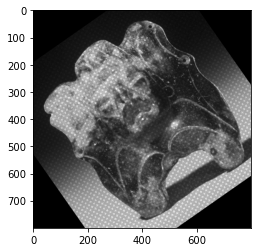

In [338]:
B = rotation(A, 35)
plt.imshow(B, cmap='gray')

In [382]:
def medianFilterBN(A:np.array):
    result = np.zeros(A.shape, dtype=np.uint8)
    M, N = A.shape[0],A.shape[1]
    # esquinas
    result[0][N-1] = np.median([A[0][N-1],
                                A[1][N-1],
                                A[0][N-1]])
    result[M-1][0] = np.median([A[M-1][0],
                                A[M-1][0],
                                A[M-1][1]])
    result[M-1][N-1] = np.median([A[M-1][N-1],
                                  A[M-1][N-1],
                                  A[M-1][N-1]])
    result[0][0] = np.median([A[0][0],
                              A[0][1],
                              A[1][0]])
    for y in range(1,N-1):
        result[0][y] = np.median(np.concatenate(
                        (A[0][y-1:y+1],
                        A[1][y-1:y+1])))
        result[M-1][y] = np.median(np.concatenate(
                        (A[M-1][y-1:y+1],
                        A[M-2][y-1:y+1]))) 
    for x in range(1,M-1):
        result[x][0] = np.median(np.concatenate(
                        (A[x-1][:2],
                        A[x][:2],
                        A[x+1][:2])))
        result[x][N-1] = np.median(np.concatenate(
                        (A[x-1][-2:],
                        A[x][-2:],
                        A[x+1][-2:])))
        for y in range(1,N-1):
            result[x][y] = np.median(np.concatenate(
                        (A[x-1][y-1:y+1],
                        A[x][y-1:y+1],
                        A[x+1][y-1:y+1])))

    return result

In [383]:
B = rotation(A[:400][:400], 35)
Bm=medianFilterBN(B)

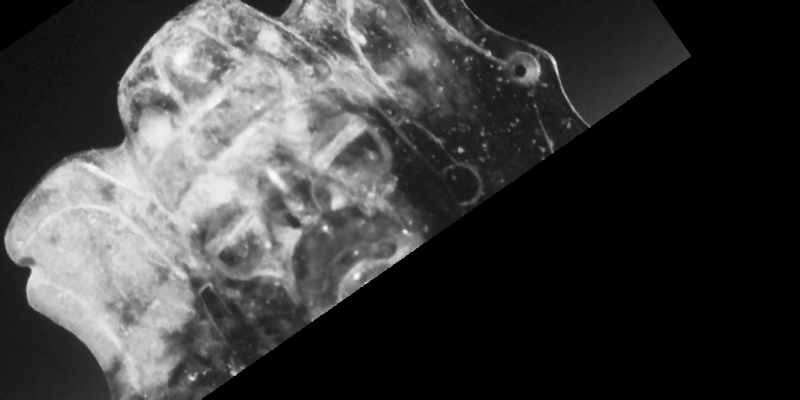

In [384]:
Image.fromarray(Bm)

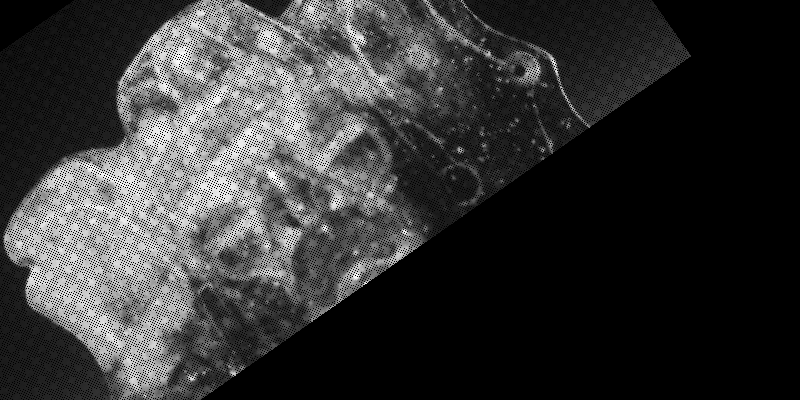

In [385]:
Image.fromarray(B)

In [249]:
def ripping(A:np.array,Ax=15,Ay=15,Lx=75,Ly=75):
    result = np.zeros(A.shape,dtype=np.uint8)
    M, N = A.shape[0],A.shape[1]
    for x in range(M):
        for y in range(N):
            x_new=round(x+Ax*np.sin(2*np.pi*y/Lx))
            y_new=round(y+Ay*np.sin(2*np.pi*x/Ly))
            if (x_new>=0 and  x_new<M and y_new>=0 and  y_new<N ):
                result[x_new][y_new]=A[x][y]
    return result

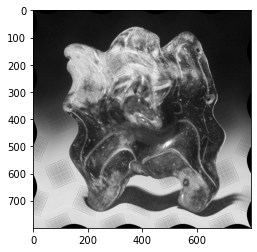

In [250]:
B=ripping(A,Ax=15,Ay=15,Lx=200,Ly=200)
plt.imshow(B, cmap='gray')


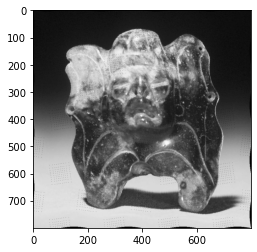

In [251]:
B=ripping(A,Ax=5,Ay=5,Lx=200,Ly=200)
plt.imshow(B, cmap='gray')

In [274]:
def rippingAnimation(A, filename="out.gif", minA=0, maxA=50, step=5,Lx=200,Ly=200):
    images=[]
    for a in range(minA, maxA, step):
        images.append(ripping(A,Ax=a,Ay=a,Lx=Lx,Ly=Ly))
    B_img=list(map(Image.fromarray, images))
    B_img[0].save(filename,save_all=True, append_images=B_img[1:], loop=0)    

In [275]:
A_color=imageToArray("WingedFigure.jpg", rgb=True)
rippingAnimation(A_color, filename="test.gif", minA=0, maxA=100, step=5,Lx=200,Ly=200)

In [353]:
np.median(np.concatenate([np.array([1,7,34,9993]), np.array([1,2,345])]))

7.0